In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Visualization libraries
import plotly.express as px
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight') 

In [160]:
df= pd.read_csv('Masterfile.csv', sep = ',')

In [161]:
df.describe()

,"How comfortable would you be in having vaping related conversations with your parents? - From 1 - Not Comfortable at all, to 5 - Very Comfortable",Rate the following levels regarding your workplace - Job Satisfaction,Rate the following levels regarding your workplace - Happiness to come into work,Rate the following levels regarding your workplace - Workload,Rate the following levels regarding your workplace - Anxiety Level regarding work,Rate the following levels regarding your workplace - Toxicity of work environment,How many colleagues do you know vape in your workplace?
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,3.093333,3.586667,3.400000,3.826667,3.186667,2.173333,1.826667
std,1.552446,0.973893,1.013423,0.977771,1.193375,1.057449,3.297720
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000,0.000000
50%,3.000000,4.000000,4.000000,4.000000,3.000000,2.000000,1.000000
75%,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000,2.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,20.000000


In [162]:
df.drop('Recorded Date', inplace=True, axis=1)
df.drop('Response ID', inplace=True, axis=1)

In [163]:
df = df.fillna("NIL")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 53 columns):
 #   Column                                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                                             --------------  ----- 
 0   Age Range                                                                                                                                          75 non-null     object
 1   Sex                                                                                                                                                75 non-null     object
 2   Marital Status                                                                                                                                     75 non-null     object
 3   Race/Ethnicity   

In [164]:
df.columns

Index(['Age Range', 'Sex', 'Marital Status', 'Race/Ethnicity',
       'Highest Education Qualification', 'Industry Sector',
       'Type of Workplace', 'Type of Job', 'When did you join the workplace?',
       'How long have you worked in your current job?',
       'Have you vaped before?', 'What is the frequency of your vape usage?',
       'How long have you been vaping for?',
       'Why did you start vaping despite its illegality? - Selected Choice',
       'Why did you start vaping despite its illegality? - Others - Text',
       'Why did you continue vaping after trying it? - Selected Choice',
       'Why did you continue vaping after trying it? - Others - Text',
       'Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice',
       'Do you feel vaping is healthier than smoking? If yes, why? - Yes - Text',
       'Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice',
       'Do you think 2nd Hand Vape is healthier tha

In [165]:
df['Have you attempted to quit before?'].value_counts()

NIL    51
Yes    14
No     10
Name: Have you attempted to quit before?, dtype: int64

# Clustering by the vaping perception(hard clustering)

In [166]:
perceptiondf = df[[
       'Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice',
       'Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice',
       'Do your Parents Smoke/Vape?',
       'How comfortable would you be in having vaping related conversations with your parents? - From 1 - Not Comfortable at all, to 5 - Very Comfortable',
       'Do you know any close family members/friends that have smoking/vaping related illnesses?',
       'How many colleagues do you know vape in your workplace?',
       'What is the attitude towards vaping in your work setting? - Selected Choice',
   'If you were offered to vape during a client meeting by your boss or client, would you be pressured to accept? \r\nwhy? - Selected Choice',
    'If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice',
       'Do you think the law is too lenient?']]

#'Age Range', 'Sex', 'Marital Status', 'Race/Ethnicity',
#'Highest Education Qualification', 'Industry Sector',
#'Type of Workplace', 'Type of Job', 'When did you join the workplace?',
#'How long have you worked in your current job?',

#'Rate the following levels regarding your workplace - Job Satisfaction',
#      'Rate the following levels regarding your workplace - Happiness to come into work',
#      'Rate the following levels regarding your workplace - Workload',
#      'Rate the following levels regarding your workplace - Anxiety Level regarding work',
#      'Rate the following levels regarding your workplace - Toxicity of work environment',
perceptiondf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 10 columns):
 #   Column                                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                                             --------------  ----- 
 0   Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice                                                                       75 non-null     object
 1   Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice                                                        75 non-null     object
 2   Do your Parents Smoke/Vape?                                                                                                                        75 non-null     object
 3   How comfortable w

In [167]:
columns = perceptiondf.columns

In [168]:
df_display = pd.DataFrame(columns,columns=['input'])

In [169]:
import dataframe_image as dfi

In [170]:
df_display['sample'] = perceptiondf.iloc[20].to_list()

In [171]:
dfi.export(df_display,'df3.png')

In [172]:
one_hot_encoded_data = pd.get_dummies(perceptiondf,drop_first=True,columns = [
           'Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice',
       'Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice',
       'Do your Parents Smoke/Vape?',
       'Do you know any close family members/friends that have smoking/vaping related illnesses?',
#        'What is the attitude towards vaping in your work setting? - Selected Choice',
   'If you were offered to vape during a client meeting by your boss or client, would you be pressured to accept? \r\nwhy? - Selected Choice',
    'If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice',
       'Do you think the law is too lenient?'])


In [173]:
one_hot_encoded_data = pd.get_dummies(one_hot_encoded_data,columns = [
#            'Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice',
#        'Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice',
#        'Do your Parents Smoke/Vape?',
#        'Do you know any close family members/friends that have smoking/vaping related illnesses?',
       'What is the attitude towards vaping in your work setting? - Selected Choice',
#    'If you were offered to vape during a client meeting by your boss or client, would you be pressured to accept? \r\nwhy? - Selected Choice',
#     'If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice',
#        'Do you think the law is too lenient?'
])
one_hot_encoded_data.head()


In [174]:
one_hot_encoded_data.drop('Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice_No', inplace=True, axis=1)
one_hot_encoded_data.drop('Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice_No', inplace=True, axis=1)

In [175]:
one_hot_encoded_data
aggdata =one_hot_encoded_data.copy()

In [176]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering

In [177]:
scaler = MinMaxScaler()
#normalise (Scale values) to 0 and 1
aggdata_np = scaler.fit_transform(aggdata)
aggdata_scaled = pd.DataFrame(aggdata_np, columns= aggdata.columns, index = aggdata.index)
aggdata_scaled

,"How comfortable would you be in having vaping related conversations with your parents? - From 1 - Not Comfortable at all, to 5 - Very Comfortable",How many colleagues do you know vape in your workplace?,Do your Parents Smoke/Vape?_Yes,Do you know any close family members/friends that have smoking/vaping related illnesses?_Yes,"If you were offered to vape during a client meeting by your boss or client, would you be pressured to accept? \r\nwhy? - Selected Choice_Yes","If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice_Yes",Do you think the law is too lenient?_Yes,"Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice_They are the same","Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice_Yes","Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice_They are the same","Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice_Yes","What is the attitude towards vaping in your work setting? - Selected Choice_Acceptable, many people do it in the workplace itself","What is the attitude towards vaping in your work setting? - Selected Choice_Nobody vapes during work, seen as not professional/taboo",What is the attitude towards vaping in your work setting? - Selected Choice_Others,"What is the attitude towards vaping in your work setting? - Selected Choice_People do it in secret, not done openly (E.g. during breaktime)"
0,0.00,0.05,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.00,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.00,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.00,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.00,0.10,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1.00,0.50,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
71,0.25,0.05,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
72,0.00,0.15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
73,0.25,0.05,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


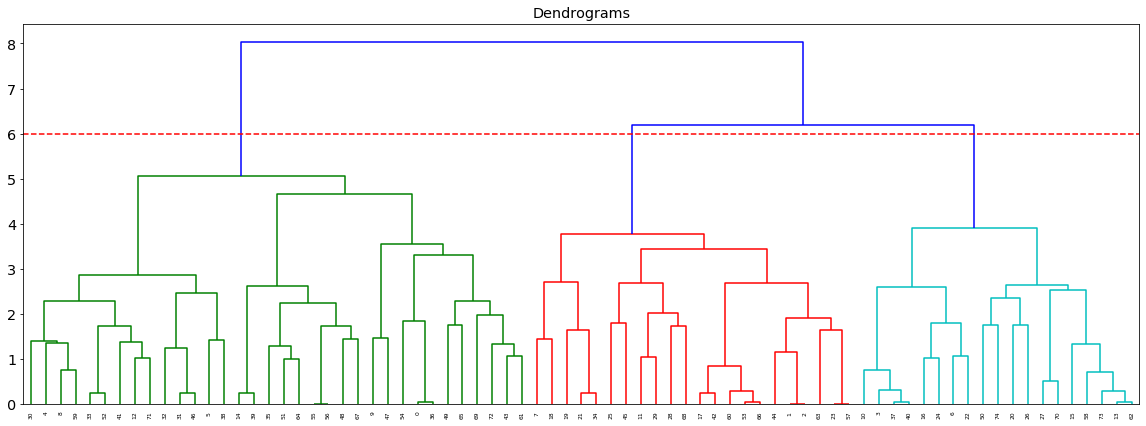

In [181]:
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms") 
#the height shows the distance
plt.axhline(y=6, color='r', linestyle='--')

#methods can be one of the following: 'single', 'complete', 'average', 'centroid', 'weighted', 'median', 'ward'
dend = shc.dendrogram(shc.linkage(aggdata_scaled, method='ward'),labels=list(aggdata_scaled.index.values))


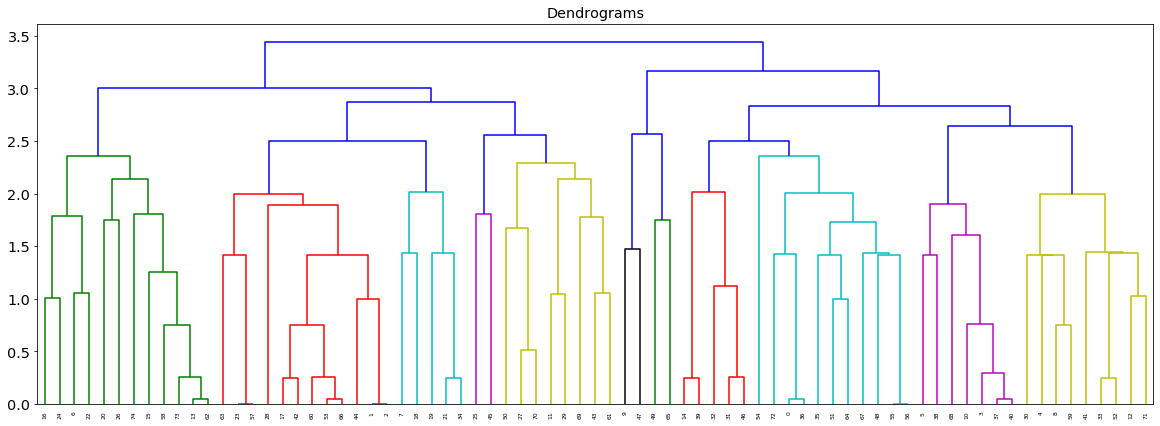

In [118]:
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms") 
#the height shows the distance
plt.axhline(y=7, color='r', linestyle='--')
dend = shc.dendrogram(shc.linkage(aggdata_scaled, method='complete'),labels=list(aggdata_scaled.index.values))


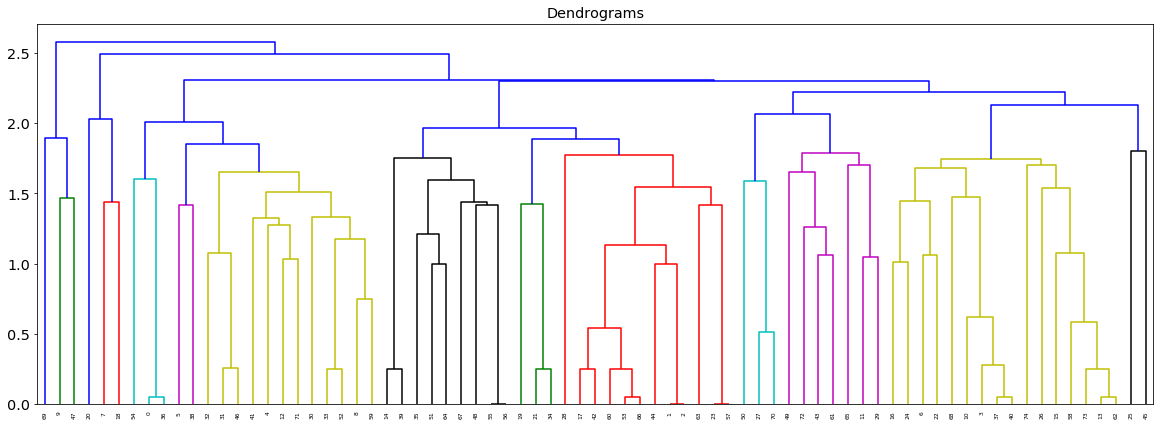

In [119]:
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms") 
#the height shows the distance
plt.axhline(y=7, color='r', linestyle='--')
dend = shc.dendrogram(shc.linkage(aggdata_scaled, method='average'),labels=list(aggdata_scaled.index.values))


In [183]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster = model.fit_predict(aggdata_scaled)

# fit model and predict clusters
cluster = model.fit_predict(aggdata_scaled)
aggdata_scaled['cluster'] = cluster
aggdata_scaled

,"How comfortable would you be in having vaping related conversations with your parents? - From 1 - Not Comfortable at all, to 5 - Very Comfortable",How many colleagues do you know vape in your workplace?,Do your Parents Smoke/Vape?_Yes,Do you know any close family members/friends that have smoking/vaping related illnesses?_Yes,"If you were offered to vape during a client meeting by your boss or client, would you be pressured to accept? \r\nwhy? - Selected Choice_Yes","If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice_Yes",Do you think the law is too lenient?_Yes,"Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice_They are the same","Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice_Yes","Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice_They are the same","Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice_Yes","What is the attitude towards vaping in your work setting? - Selected Choice_Acceptable, many people do it in the workplace itself","What is the attitude towards vaping in your work setting? - Selected Choice_Nobody vapes during work, seen as not professional/taboo",What is the attitude towards vaping in your work setting? - Selected Choice_Others,"What is the attitude towards vaping in your work setting? - Selected Choice_People do it in secret, not done openly (E.g. during breaktime)",cluster
0,0.00,0.05,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
1,1.00,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
2,1.00,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
3,1.00,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,0.00,0.10,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1.00,0.50,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1
71,0.25,0.05,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
72,0.00,0.15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
73,0.25,0.05,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1


In [184]:
perceptionDecisiontree = aggdata_scaled.copy()

In [185]:
polar=aggdata_scaled.groupby("cluster").mean().reset_index()
polar=pd.melt(polar,id_vars=["cluster"])
fig2 = px.line_polar(polar, r="value", theta="variable", color="cluster", line_close=True,height=800,width=1400)
fig2.show()
print(polar)

    cluster                                           variable     value
0         0  How comfortable would you be in having vaping ...  0.426471
1         1  How comfortable would you be in having vaping ...  0.526316
2         2  How comfortable would you be in having vaping ...  0.670455
3         0  How many colleagues do you know vape in your w...  0.088235
4         1  How many colleagues do you know vape in your w...  0.126316
5         2  How many colleagues do you know vape in your w...  0.065909
6         0                    Do your Parents Smoke/Vape?_Yes  0.323529
7         1                    Do your Parents Smoke/Vape?_Yes  0.052632
8         2                    Do your Parents Smoke/Vape?_Yes  0.000000
9         0  Do you know any close family members/friends t...  0.294118
10        1  Do you know any close family members/friends t...  0.052632
11        2  Do you know any close family members/friends t...  0.272727
12        0  If you were offered to vape during a c

C:\Users\99zhe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 13 missing from current font.

C:\Users\99zhe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning:

Glyph 13 missing from current font.



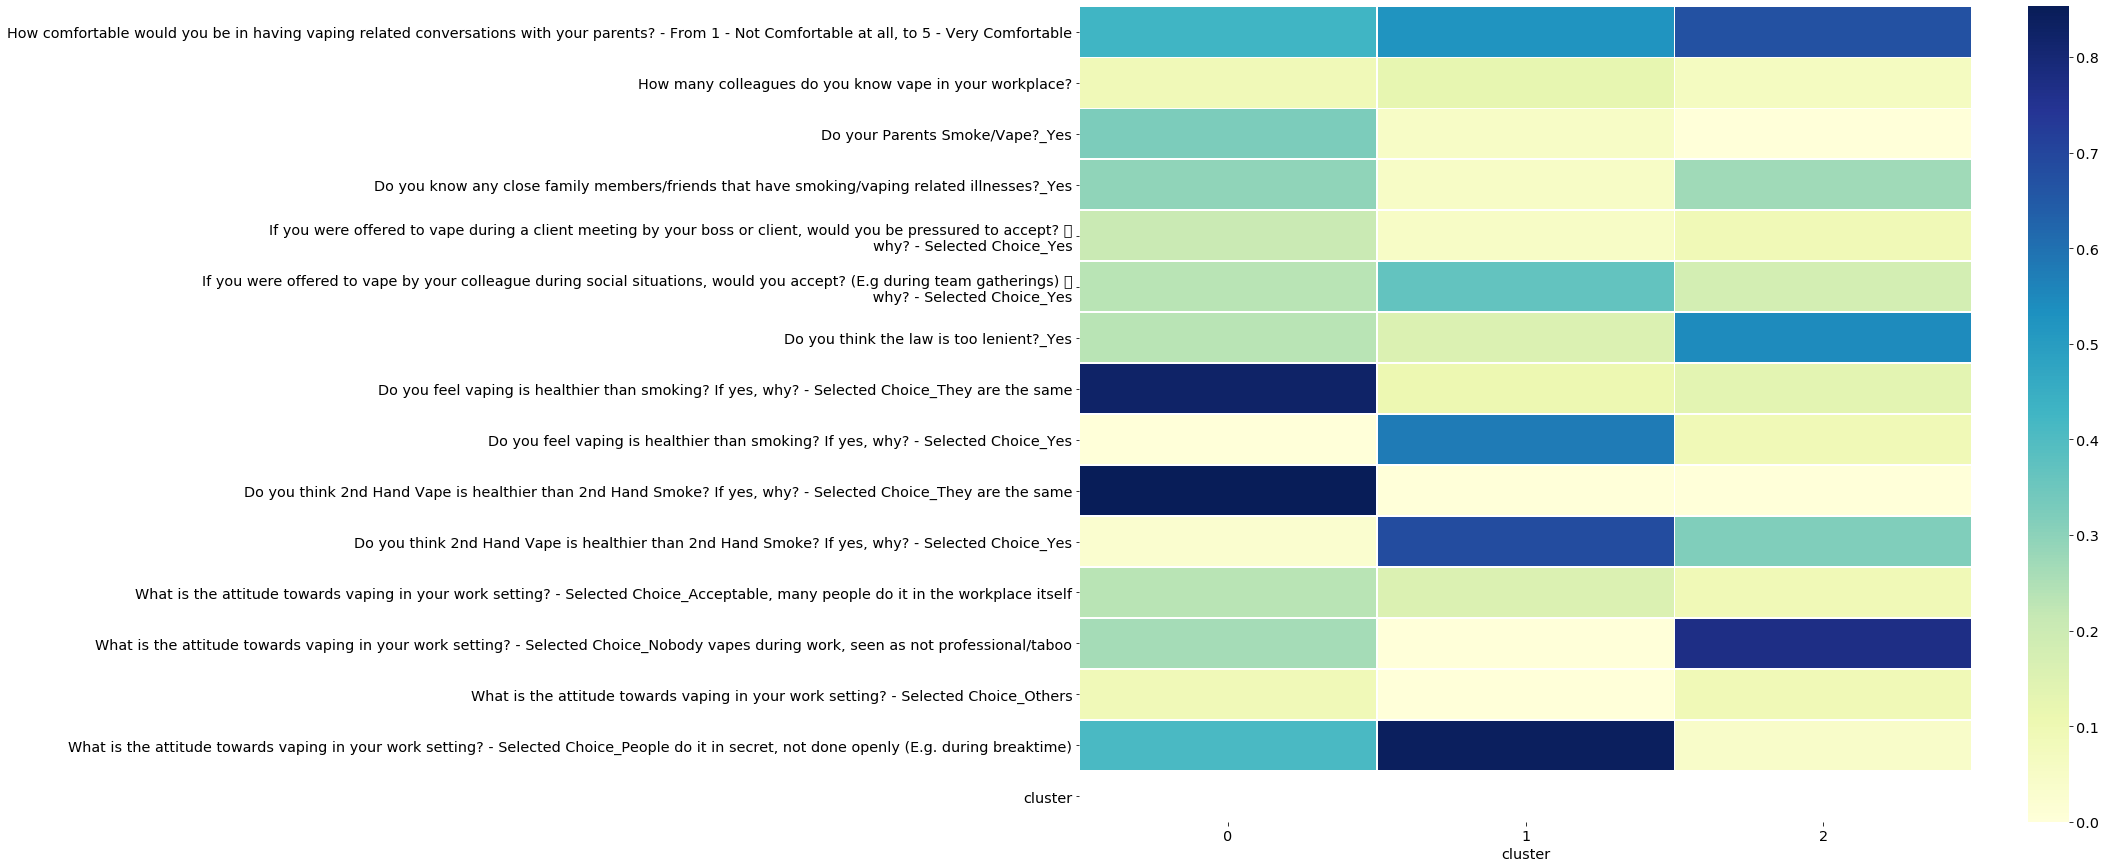

In [186]:
clust_means_wt = pd.DataFrame(aggdata_scaled.groupby('cluster').mean(), columns=aggdata_scaled.columns)
plt.subplots(figsize=(20,15))
sns.heatmap(clust_means_wt.T,  linewidths=.6, cmap="YlGnBu")

In [124]:
vaped = df["Have you vaped before?"] 
aggdata_scaled["Vaped"] = vaped
aggdata_scaled.head()

,"How comfortable would you be in having vaping related conversations with your parents? - From 1 - Not Comfortable at all, to 5 - Very Comfortable",How many colleagues do you know vape in your workplace?,Do your Parents Smoke/Vape?_Yes,Do you know any close family members/friends that have smoking/vaping related illnesses?_Yes,"If you were offered to vape during a client meeting by your boss or client, would you be pressured to accept? \r\nwhy? - Selected Choice_Yes","If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice_Yes",Do you think the law is too lenient?_Yes,"Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice_They are the same","Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice_Yes","Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice_They are the same","Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice_Yes","What is the attitude towards vaping in your work setting? - Selected Choice_Acceptable, many people do it in the workplace itself","What is the attitude towards vaping in your work setting? - Selected Choice_Nobody vapes during work, seen as not professional/taboo",What is the attitude towards vaping in your work setting? - Selected Choice_Others,"What is the attitude towards vaping in your work setting? - Selected Choice_People do it in secret, not done openly (E.g. during breaktime)",cluster,Vaped
0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,Yes
1,1.0,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,No
2,1.0,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,No
3,1.0,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,No
4,0.0,0.10,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,Yes


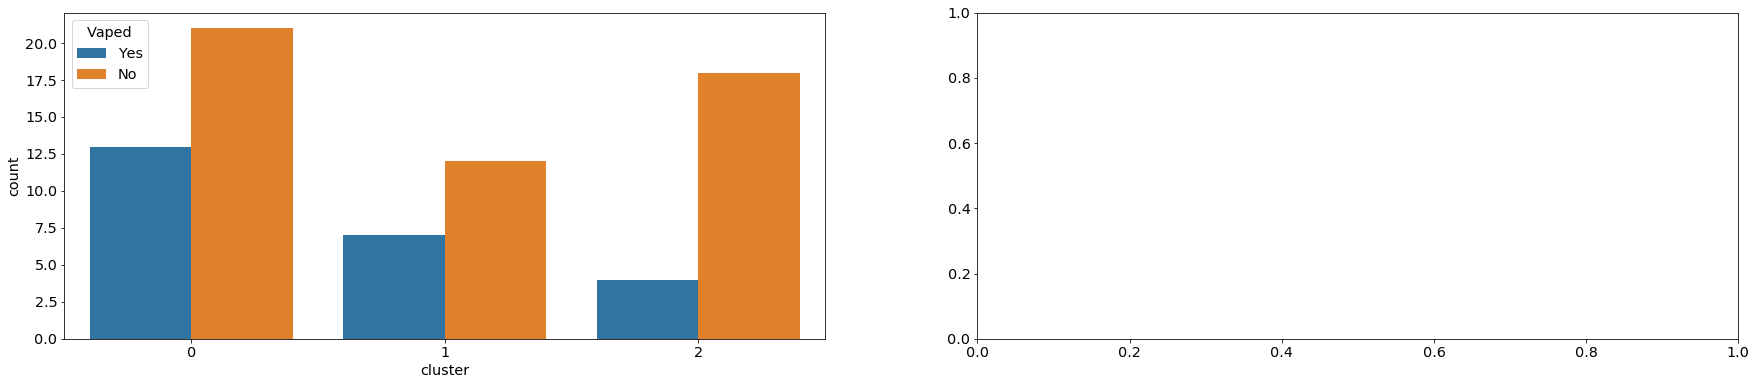

In [125]:
fig, ax = plt.subplots(1, 2 , figsize = (30,6))
sns.countplot(x = aggdata_scaled['cluster'], hue = aggdata_scaled['Vaped'], data = aggdata_scaled, ax=ax[0])


In [126]:

gmmdata= aggdata_scaled.drop('cluster', axis=1)

gmmdata= gmmdata.drop('Vaped', axis=1)
gmmdata

,"How comfortable would you be in having vaping related conversations with your parents? - From 1 - Not Comfortable at all, to 5 - Very Comfortable",How many colleagues do you know vape in your workplace?,Do your Parents Smoke/Vape?_Yes,Do you know any close family members/friends that have smoking/vaping related illnesses?_Yes,"If you were offered to vape during a client meeting by your boss or client, would you be pressured to accept? \r\nwhy? - Selected Choice_Yes","If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice_Yes",Do you think the law is too lenient?_Yes,"Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice_They are the same","Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice_Yes","Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice_They are the same","Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice_Yes","What is the attitude towards vaping in your work setting? - Selected Choice_Acceptable, many people do it in the workplace itself","What is the attitude towards vaping in your work setting? - Selected Choice_Nobody vapes during work, seen as not professional/taboo",What is the attitude towards vaping in your work setting? - Selected Choice_Others,"What is the attitude towards vaping in your work setting? - Selected Choice_People do it in secret, not done openly (E.g. during breaktime)"
0,0.00,0.05,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.00,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.00,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.00,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.00,0.10,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1.00,0.50,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
71,0.25,0.05,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
72,0.00,0.15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
73,0.25,0.05,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [127]:
from sklearn.mixture import GaussianMixture

In [128]:
gmm = GaussianMixture(n_components=3, max_iter = 300, n_init = 5, random_state = 99)
gmm.fit(gmmdata)

#predictions from gmm, the labels will give the cluster with the highest probability (aka proba)
labels = gmm.predict(gmmdata)


In [129]:
labels

array([1, 2, 2, 0, 1, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 0, 0, 2, 2, 2, 0, 2,
       0, 2, 0, 2, 0, 0, 2, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 2, 0,
       2, 2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 0, 0, 2, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 0, 0], dtype=int64)

In [130]:
# Check out the soft assignment features
probs = gmm.predict_proba(gmmdata)

# Each cluster is given a probability (i.e., proba)
gmm_output = pd.DataFrame(probs.round(3), columns = ['Cluster 0 Prob', 'Cluster 1 Prob', 'Cluster 2 Prob'])
gmm_output

,Cluster 0 Prob,Cluster 1 Prob,Cluster 2 Prob
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
70,1.0,0.0,0.0
71,0.0,1.0,0.0
72,0.0,1.0,0.0
73,1.0,0.0,0.0


In [131]:
# Taking the highest probability and assign as cluster (this is like hard clustering)
gmmdata['cluster'] = labels
gmmdata

,"How comfortable would you be in having vaping related conversations with your parents? - From 1 - Not Comfortable at all, to 5 - Very Comfortable",How many colleagues do you know vape in your workplace?,Do your Parents Smoke/Vape?_Yes,Do you know any close family members/friends that have smoking/vaping related illnesses?_Yes,"If you were offered to vape during a client meeting by your boss or client, would you be pressured to accept? \r\nwhy? - Selected Choice_Yes","If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice_Yes",Do you think the law is too lenient?_Yes,"Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice_They are the same","Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice_Yes","Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice_They are the same","Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice_Yes","What is the attitude towards vaping in your work setting? - Selected Choice_Acceptable, many people do it in the workplace itself","What is the attitude towards vaping in your work setting? - Selected Choice_Nobody vapes during work, seen as not professional/taboo",What is the attitude towards vaping in your work setting? - Selected Choice_Others,"What is the attitude towards vaping in your work setting? - Selected Choice_People do it in secret, not done openly (E.g. during breaktime)",cluster
0,0.00,0.05,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
1,1.00,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
2,1.00,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
3,1.00,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0.00,0.10,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1.00,0.50,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0
71,0.25,0.05,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
72,0.00,0.15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
73,0.25,0.05,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0


In [132]:
polar=gmmdata.groupby("cluster").mean().reset_index()
polar=pd.melt(polar,id_vars=["cluster"])
fig3 = px.line_polar(polar, r="value", theta="variable", color="cluster", line_close=True,height=800,width=1400)
fig3.show()

C:\Users\99zhe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 13 missing from current font.

C:\Users\99zhe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning:

Glyph 13 missing from current font.



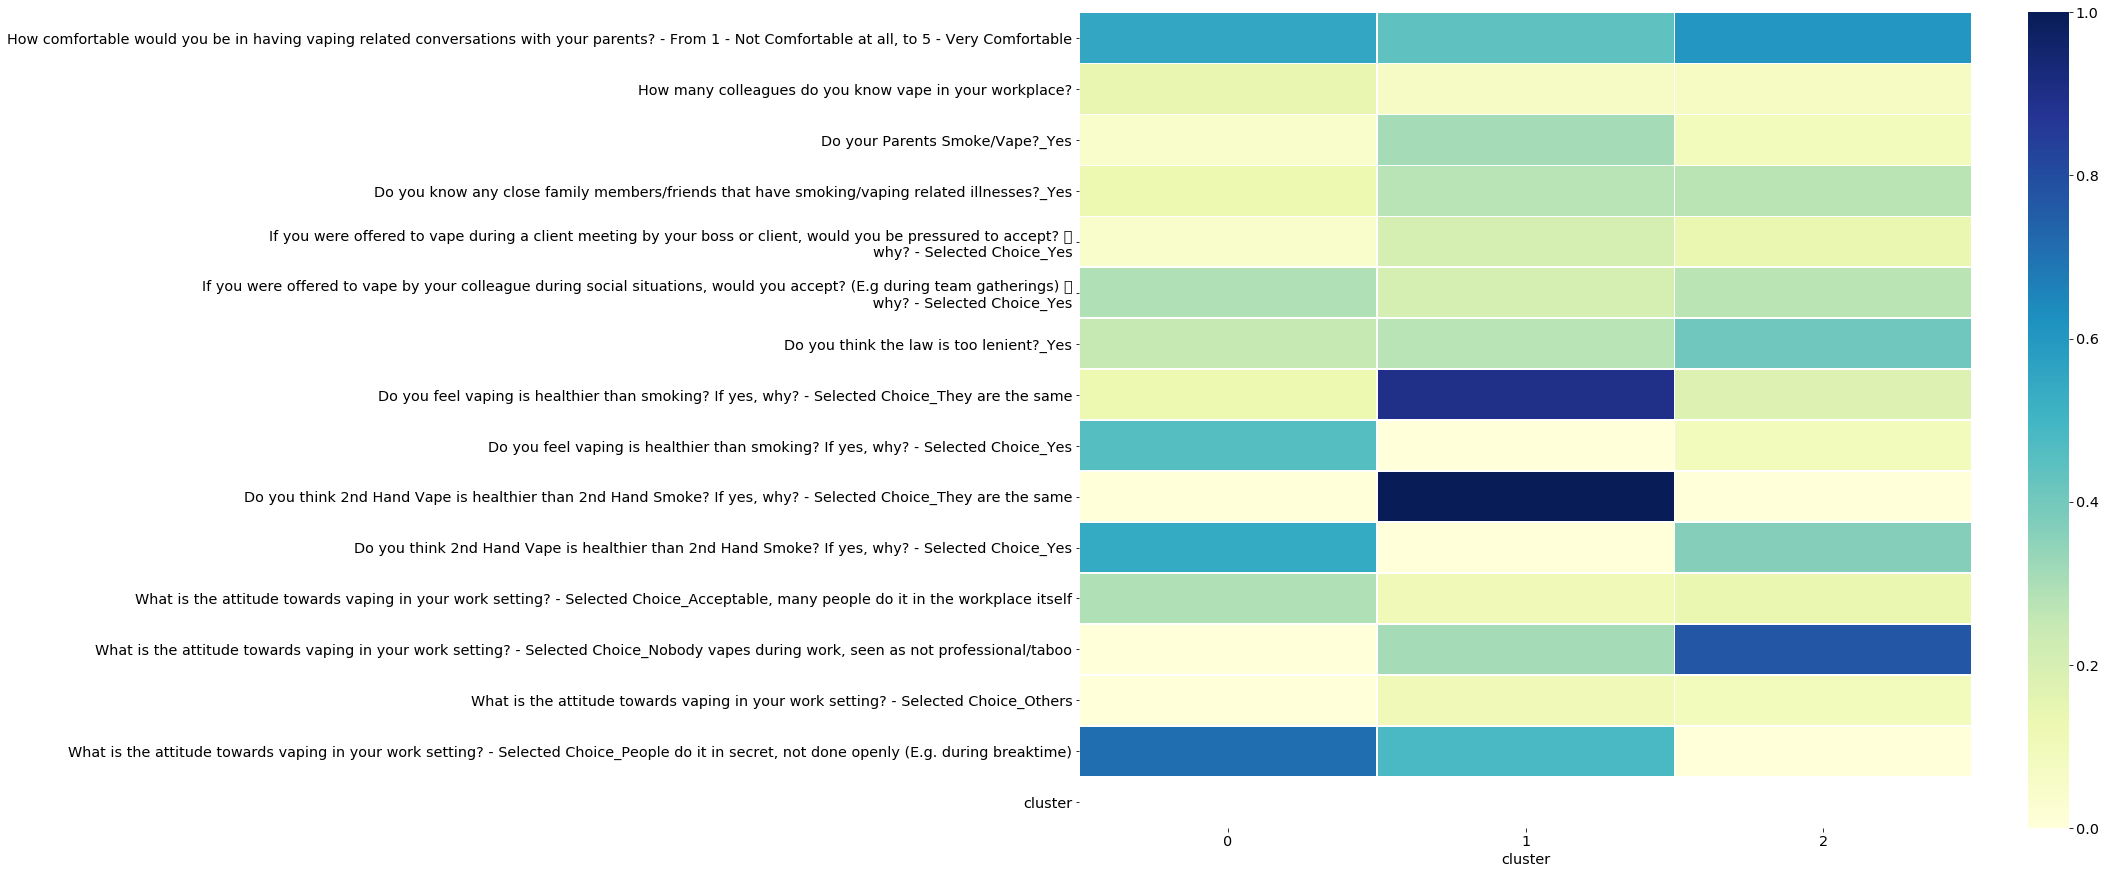

In [133]:
clust_means_gmm = pd.DataFrame(gmmdata.groupby('cluster').mean(), columns=gmmdata.columns)
plt.subplots(figsize=(20,15))
sns.heatmap(clust_means_gmm.T,  linewidths=.5, cmap="YlGnBu")

In [134]:
vaped = df["Have you vaped before?"] 
gmmdata["Vaped"] = vaped
gmmdata.head()

,"How comfortable would you be in having vaping related conversations with your parents? - From 1 - Not Comfortable at all, to 5 - Very Comfortable",How many colleagues do you know vape in your workplace?,Do your Parents Smoke/Vape?_Yes,Do you know any close family members/friends that have smoking/vaping related illnesses?_Yes,"If you were offered to vape during a client meeting by your boss or client, would you be pressured to accept? \r\nwhy? - Selected Choice_Yes","If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice_Yes",Do you think the law is too lenient?_Yes,"Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice_They are the same","Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice_Yes","Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice_They are the same","Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice_Yes","What is the attitude towards vaping in your work setting? - Selected Choice_Acceptable, many people do it in the workplace itself","What is the attitude towards vaping in your work setting? - Selected Choice_Nobody vapes during work, seen as not professional/taboo",What is the attitude towards vaping in your work setting? - Selected Choice_Others,"What is the attitude towards vaping in your work setting? - Selected Choice_People do it in secret, not done openly (E.g. during breaktime)",cluster,Vaped
0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,Yes
1,1.0,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,No
2,1.0,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,No
3,1.0,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,No
4,0.0,0.10,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,Yes


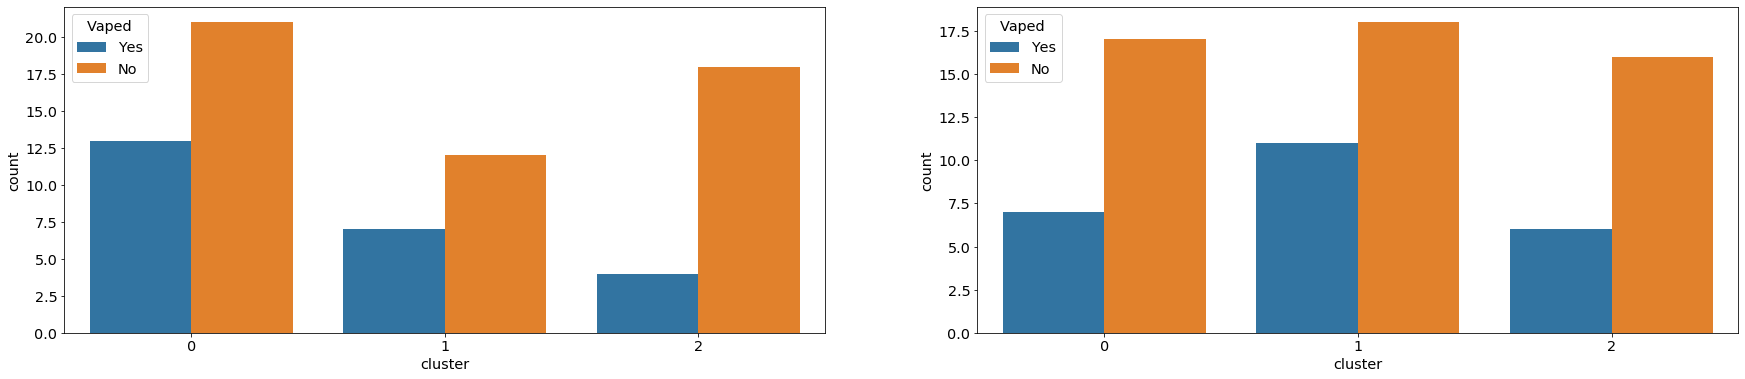

In [135]:
fig, ax = plt.subplots(1, 2 , figsize = (30,6))
sns.countplot(x = aggdata_scaled['cluster'], hue = aggdata_scaled['Vaped'], data = aggdata_scaled, ax=ax[0])
sns.countplot(x = gmmdata['cluster'], hue = gmmdata['Vaped'], data = gmmdata, ax=ax[1])


In [136]:
from sklearn.decomposition import PCA

In [137]:
model1= aggdata_scaled.drop('cluster', axis=1)

model1= model1.drop('Vaped', axis=1)
model1

,"How comfortable would you be in having vaping related conversations with your parents? - From 1 - Not Comfortable at all, to 5 - Very Comfortable",How many colleagues do you know vape in your workplace?,Do your Parents Smoke/Vape?_Yes,Do you know any close family members/friends that have smoking/vaping related illnesses?_Yes,"If you were offered to vape during a client meeting by your boss or client, would you be pressured to accept? \r\nwhy? - Selected Choice_Yes","If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice_Yes",Do you think the law is too lenient?_Yes,"Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice_They are the same","Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice_Yes","Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice_They are the same","Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice_Yes","What is the attitude towards vaping in your work setting? - Selected Choice_Acceptable, many people do it in the workplace itself","What is the attitude towards vaping in your work setting? - Selected Choice_Nobody vapes during work, seen as not professional/taboo",What is the attitude towards vaping in your work setting? - Selected Choice_Others,"What is the attitude towards vaping in your work setting? - Selected Choice_People do it in secret, not done openly (E.g. during breaktime)"
0,0.00,0.05,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.00,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.00,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.00,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.00,0.10,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1.00,0.50,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
71,0.25,0.05,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
72,0.00,0.15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
73,0.25,0.05,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [138]:
pca = PCA(2)
 
#Transform the data
pc = pca.fit_transform(model1)
pc

array([[-0.92913701, -0.10489477],
       [ 0.42561098,  1.09886212],
       [ 0.42561098,  1.09886212],
       [ 0.3731698 , -0.44859296],
       [-0.92523702, -0.99497122],
       [-0.4521756 , -0.39971386],
       [ 0.33087942, -0.80513576],
       [ 1.02840049,  0.85744064],
       [-0.70545638, -0.78054768],
       [-0.92588897, -0.0830354 ],
       [ 0.27926471, -0.56559762],
       [ 0.4488635 ,  0.6980842 ],
       [-0.94128826, -0.72550495],
       [ 1.02462958, -0.84492601],
       [-0.98687051,  1.03630522],
       [ 1.02878397, -0.55059843],
       [ 0.10575675, -0.79156773],
       [ 0.29290128,  0.65565744],
       [ 1.10229191,  0.3729461 ],
       [ 0.010495  ,  0.5587021 ],
       [ 0.94533716, -0.84857897],
       [ 0.15313031,  0.46350407],
       [ 0.71077055, -0.95348662],
       [ 0.37692795,  0.75592946],
       [ 0.18197608, -0.97784608],
       [ 0.40950668,  0.48086121],
       [ 1.04701353, -1.07071129],
       [ 1.14392593, -0.14554369],
       [ 0.28297567,

In [139]:
#Getting unique labels
 
u_labels = np.unique(gmmdata['cluster'])
print(u_labels)

[0 1 2]


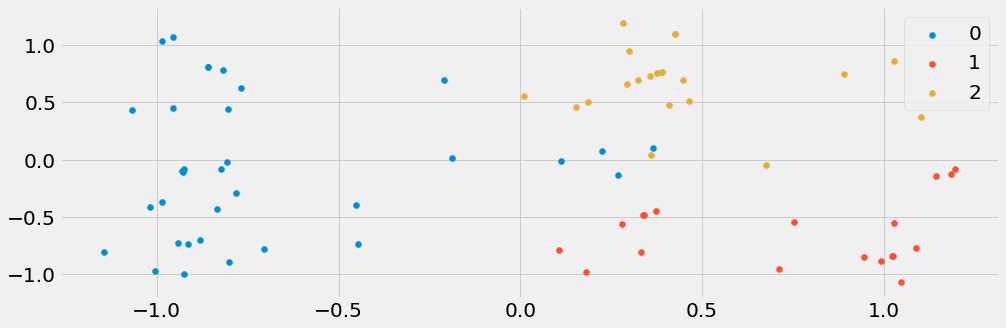

In [195]:
#plotting the results using Hierarchical clustering
for i in u_labels:
    plt.scatter(pc[aggdata_scaled['cluster'] == i , 0] , pc[aggdata_scaled['cluster'] == i, 1], label = i)
plt.legend()
plt.show()

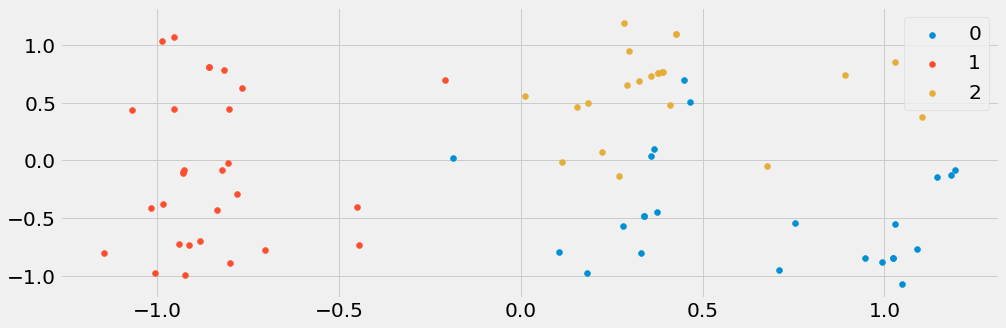

In [196]:
#plotting the results using Hierarchical clustering
for i in u_labels:
    plt.scatter(pc[gmmdata['cluster'] == i , 0] , pc[gmmdata['cluster'] == i, 1], label = i)
plt.legend()
plt.show()

In [142]:
gmmdata

,"How comfortable would you be in having vaping related conversations with your parents? - From 1 - Not Comfortable at all, to 5 - Very Comfortable",How many colleagues do you know vape in your workplace?,Do your Parents Smoke/Vape?_Yes,Do you know any close family members/friends that have smoking/vaping related illnesses?_Yes,"If you were offered to vape during a client meeting by your boss or client, would you be pressured to accept? \r\nwhy? - Selected Choice_Yes","If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice_Yes",Do you think the law is too lenient?_Yes,"Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice_They are the same","Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice_Yes","Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice_They are the same","Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice_Yes","What is the attitude towards vaping in your work setting? - Selected Choice_Acceptable, many people do it in the workplace itself","What is the attitude towards vaping in your work setting? - Selected Choice_Nobody vapes during work, seen as not professional/taboo",What is the attitude towards vaping in your work setting? - Selected Choice_Others,"What is the attitude towards vaping in your work setting? - Selected Choice_People do it in secret, not done openly (E.g. during breaktime)",cluster,Vaped
0,0.00,0.05,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,Yes
1,1.00,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,No
2,1.00,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,No
3,1.00,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,No
4,0.00,0.10,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1.00,0.50,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,Yes
71,0.25,0.05,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,No
72,0.00,0.15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,Yes
73,0.25,0.05,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,No


In [143]:
quit = df['Have you attempted to quit before?'] 
frequency = df['What is the frequency of your vape usage?']
gmmdata["Quit before"] =quit
gmmdata["Frequency"] = frequency
gmmdata.head()

,"How comfortable would you be in having vaping related conversations with your parents? - From 1 - Not Comfortable at all, to 5 - Very Comfortable",How many colleagues do you know vape in your workplace?,Do your Parents Smoke/Vape?_Yes,Do you know any close family members/friends that have smoking/vaping related illnesses?_Yes,"If you were offered to vape during a client meeting by your boss or client, would you be pressured to accept? \r\nwhy? - Selected Choice_Yes","If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice_Yes",Do you think the law is too lenient?_Yes,"Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice_They are the same","Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice_Yes","Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice_They are the same","Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice_Yes","What is the attitude towards vaping in your work setting? - Selected Choice_Acceptable, many people do it in the workplace itself","What is the attitude towards vaping in your work setting? - Selected Choice_Nobody vapes during work, seen as not professional/taboo",What is the attitude towards vaping in your work setting? - Selected Choice_Others,"What is the attitude towards vaping in your work setting? - Selected Choice_People do it in secret, not done openly (E.g. during breaktime)",cluster,Vaped,Quit before,Frequency
0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,Yes,Yes,A pod a day
1,1.0,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,No,NIL,NIL
2,1.0,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,No,NIL,NIL
3,1.0,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,No,NIL,NIL
4,0.0,0.10,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,Yes,Yes,Only during social situations


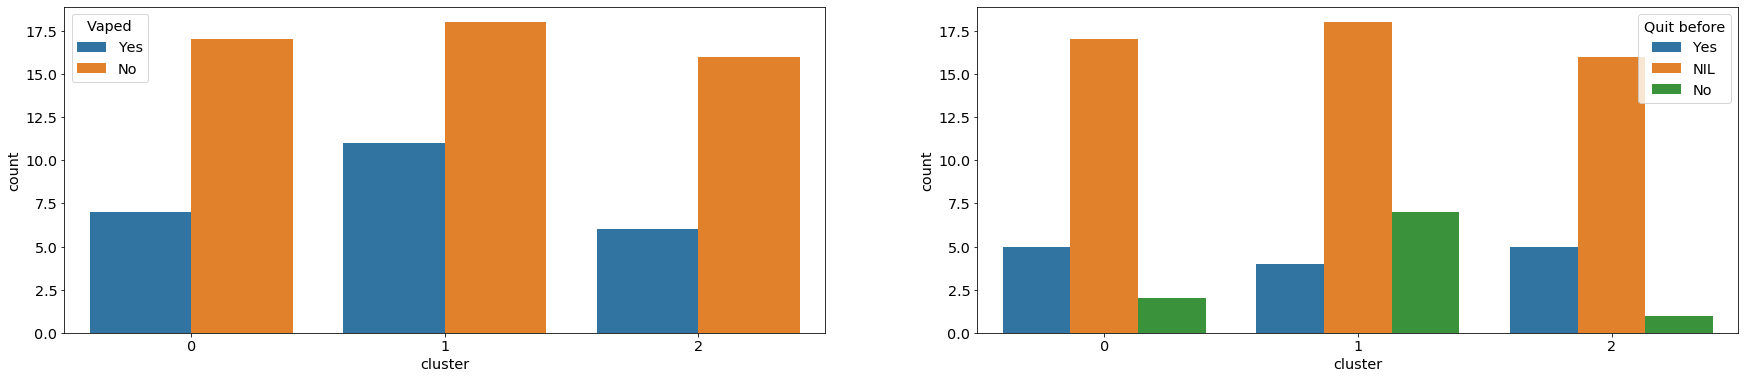

In [144]:
fig, ax = plt.subplots(1, 2 , figsize = (30,6))

sns.countplot(x = gmmdata['cluster'], hue = gmmdata['Quit before'], data = gmmdata, ax=ax[1])

sns.countplot(x = gmmdata['cluster'], hue = gmmdata['Vaped'], data = gmmdata, ax=ax[0])

In [145]:
gmmdata.groupby(["cluster","Vaped","Frequency"])["Quit before"].count()

cluster  Vaped  Frequency                    
0        No     NIL                              17
         Yes    A pod a week                      3
                More than a pod a week            2
                Only during social situations     2
1        No     NIL                              18
         Yes    A pod a day                       1
                A pod a week                      1
                Only during social situations     5
                Tried once                        4
2        No     NIL                              16
         Yes    A pod a day                       1
                More than a pod a week            1
                Only during social situations     4
Name: Quit before, dtype: int64

<h1>Decision Tree</h1>

In [146]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import train_test_split functions
from sklearn.model_selection import train_test_split

# Import accuracy_score
from sklearn.metrics import accuracy_score

In [147]:
# Instantiate dt and criterion can be gini or entropy
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state = 99)

In [148]:
x = perceptionDecisiontree.drop('cluster', axis=1)
y = perceptionDecisiontree['cluster']

In [149]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, 
                                                          stratify = y,
                                                          random_state = 99)

In [150]:
y_train.count()

60

In [151]:
# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

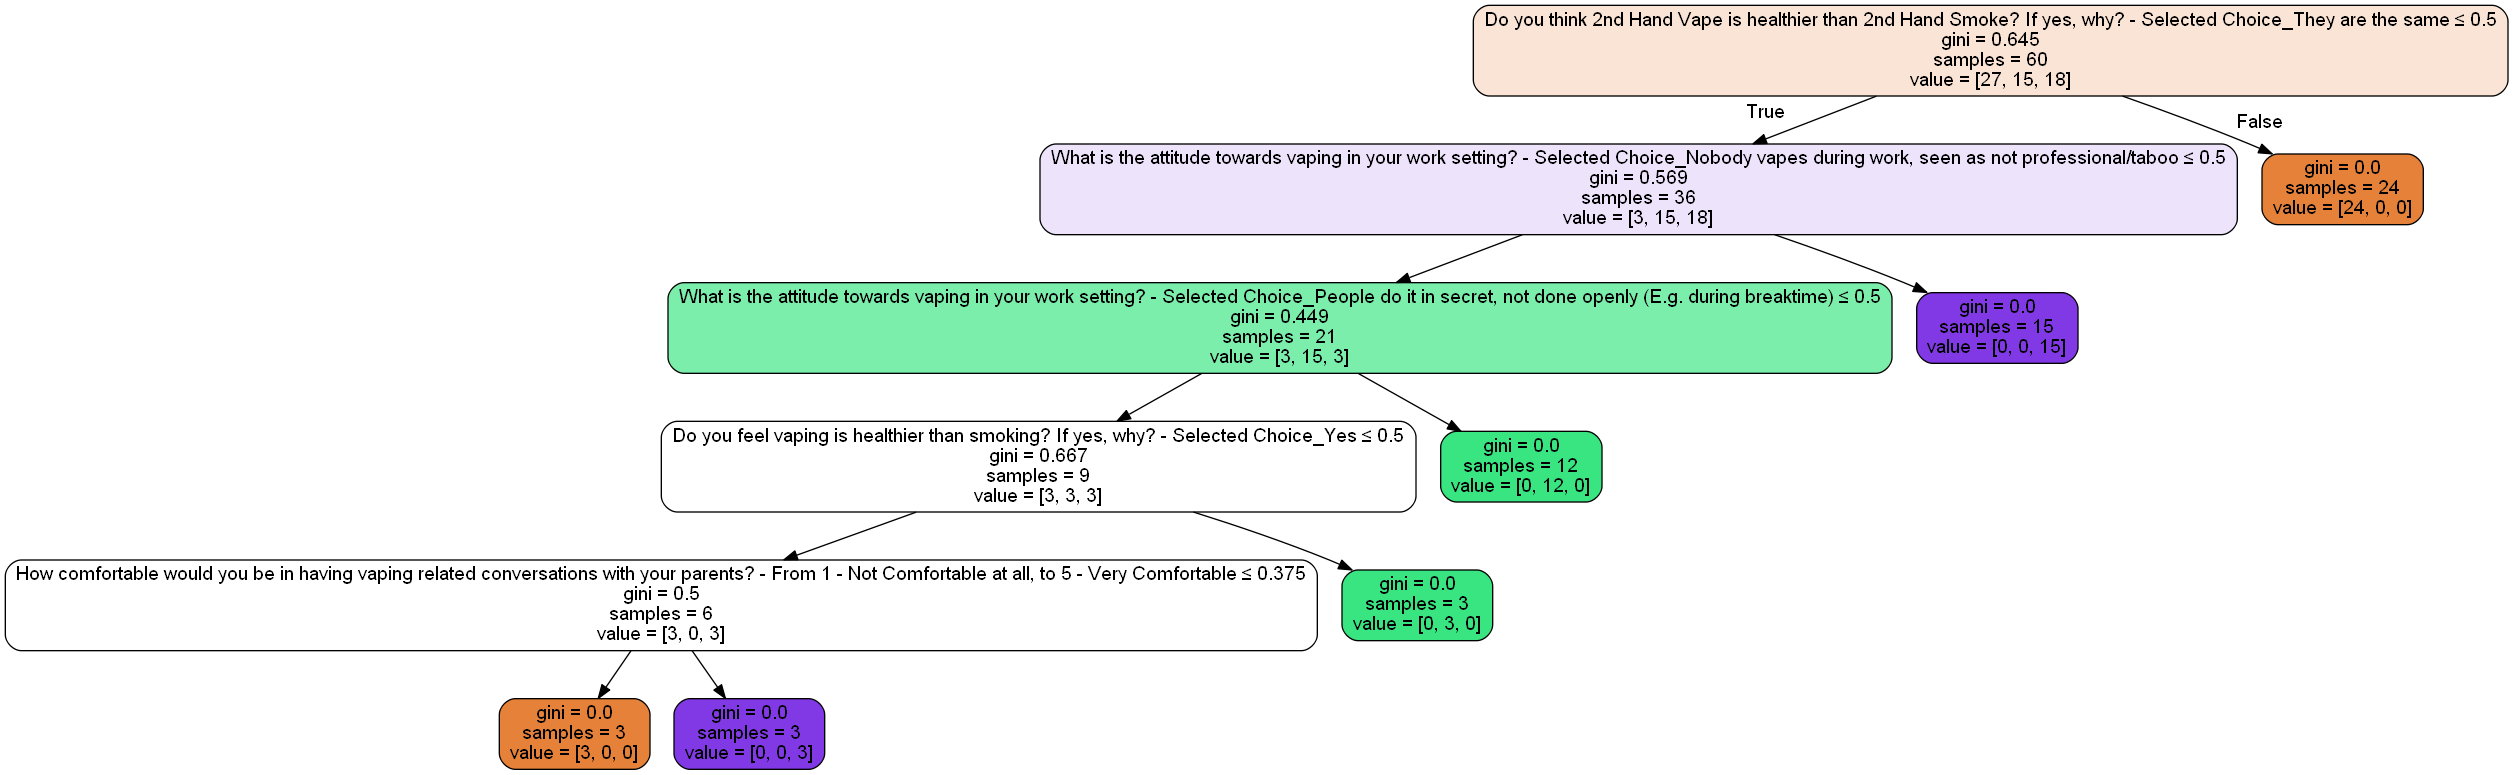

In [152]:
from sklearn.tree import export_graphviz
import pydotplus
#from sklearn.externals.six import StringIO  
import six
from six import StringIO
from IPython.display import Image

feature_cols = X_train.columns

dot_data = StringIO()
export_graphviz(dt, out_file = dot_data, 
                      feature_names = feature_cols,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('bankTree.png')
Image(graph.create_png())

In [153]:
feat_impt = pd.Series(dt.feature_importances_, index = X_train.columns)

# Sort the variable importance
sorted_feat_impt = feat_impt.sort_values()


C:\Users\99zhe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 13 missing from current font.

C:\Users\99zhe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning:

Glyph 13 missing from current font.



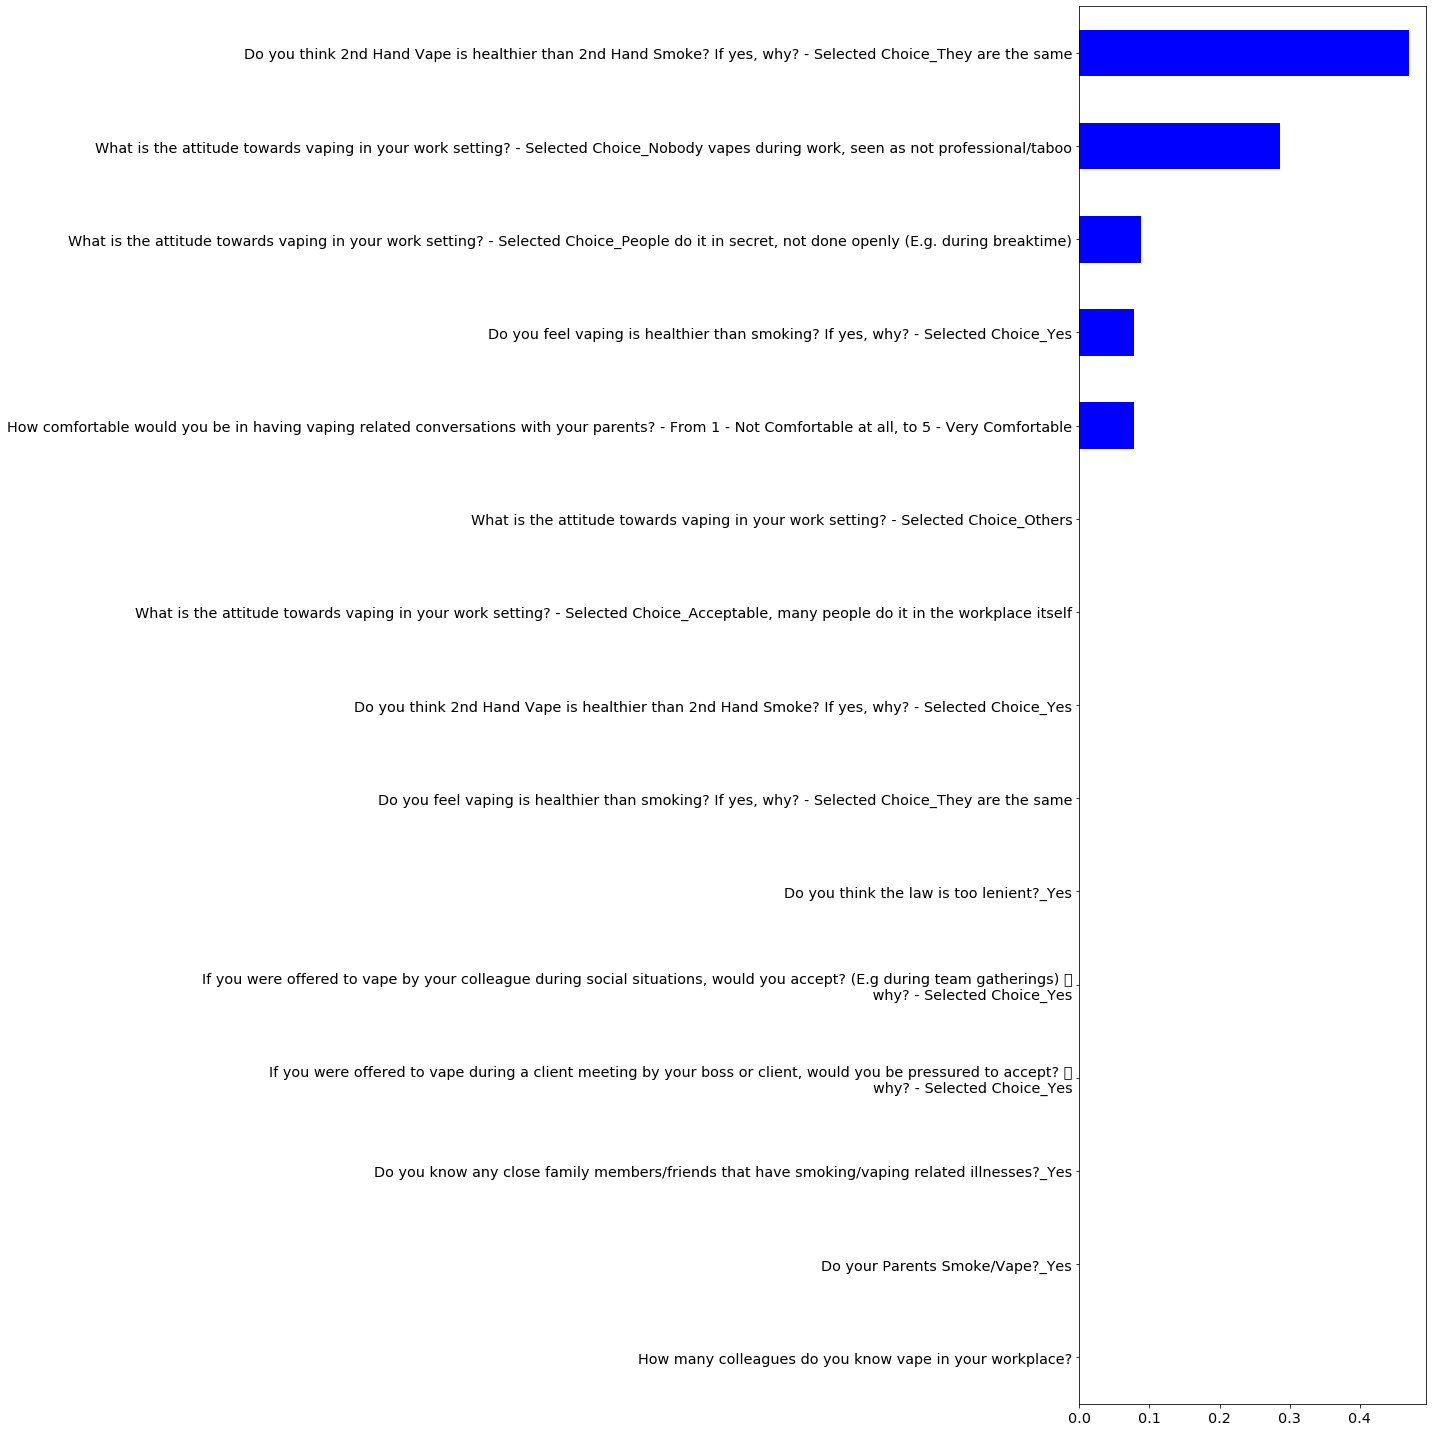

In [154]:
# Make a horizontal bar plot
sorted_feat_impt.plot(kind='barh', color='blue', figsize = (20,20))
plt.tight_layout()
params = {'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.show()

In [155]:
# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred)

[0 2 2 1 1 1 2 0 1 1 0 0 0 0 2]


In [156]:
#Print the accuracy of labels predicted.

print("Accuracy for Decision Tree :")
print(round(accuracy_score(y_test, y_pred), 3)) #comparing the actual target with the prediction

Accuracy for Decision Tree :
0.867


In [198]:
plotdata = pd.DataFrame({
    "Cluster 0":[17,7],
    "Cluster 1":[18,11],
    "Cluster 2":[16,6],
    }, index = ["No","Yes"]
)
plotdata.head()

,Cluster 0,Cluster 1,Cluster 2
No,17,18,16
Yes,7,11,6


In [199]:
plotdata.transpose()

,No,Yes
Cluster 0,17,7
Cluster 1,18,11
Cluster 2,16,6


Text(0, 0.5, 'Percentage of respondent that vaped')

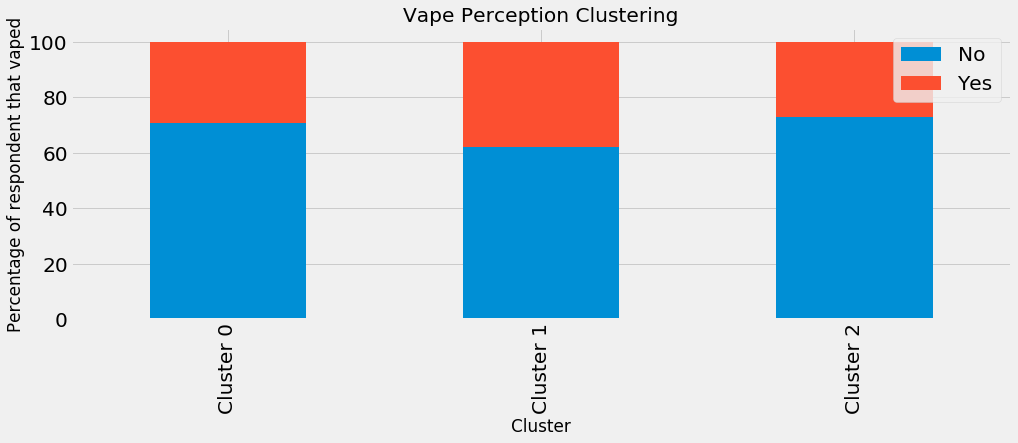

In [200]:
import matplotlib
matplotlib.style.use('fivethirtyeight') 
plotdata.transpose().apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True)
plt.title("Vape Perception Clustering")
plt.xlabel("Cluster")
plt.ylabel("Percentage of respondent that vaped")
#https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

In [197]:
gmmdata.groupby(["cluster","Vaped","Frequency"])["Quit before"].count()

cluster  Vaped  Frequency                    
0        No     NIL                              17
         Yes    A pod a week                      3
                More than a pod a week            2
                Only during social situations     2
1        No     NIL                              18
         Yes    A pod a day                       1
                A pod a week                      1
                Only during social situations     5
                Tried once                        4
2        No     NIL                              16
         Yes    A pod a day                       1
                More than a pod a week            1
                Only during social situations     4
Name: Quit before, dtype: int64

In [209]:
plotdata2 = pd.DataFrame({
    "Cluster 0":[0,3,2,0,2],
    "Cluster 1":[4,1,0,1,5],
    "Cluster 2":[0,0,1,1,4],
    }, index = ["Tried once","A pod a week","More than a pod a week","A pod a day","Only during social situations"]
)
plotdata2.head()
plotdata2.transpose()

,Tried once,A pod a week,More than a pod a week,A pod a day,Only during social situations
Cluster 0,0,3,2,0,2
Cluster 1,4,1,0,1,5
Cluster 2,0,0,1,1,4


Text(0, 0.5, 'Percentage of respondent that vape a certain amount')

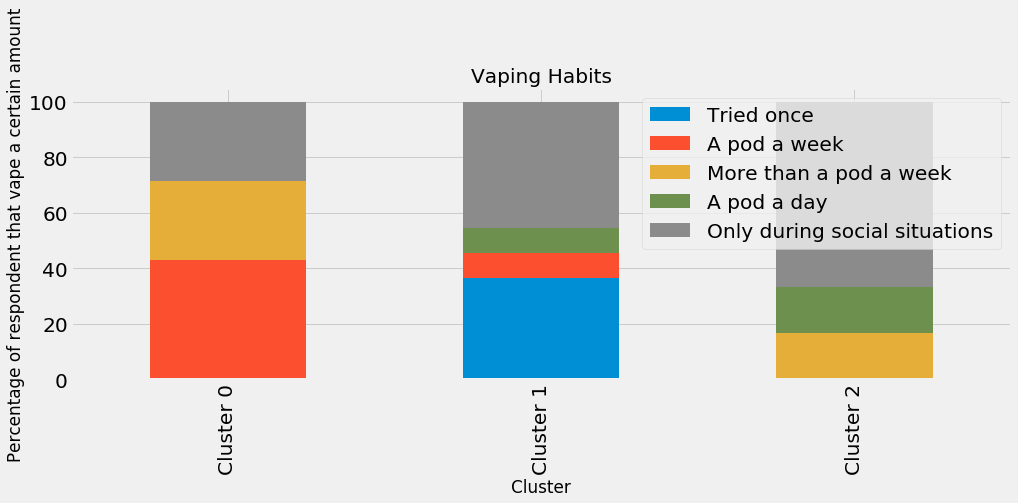

In [210]:
import matplotlib
matplotlib.style.use('fivethirtyeight') 
plotdata2.transpose().apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True)
plt.title("Vaping Habits")
plt.xlabel("Cluster")
plt.ylabel("Percentage of respondent that vape a certain amount")

In [204]:
gmmdata.groupby(["cluster","Vaped","Frequency","Quit before"])['Do your Parents Smoke/Vape?_Yes'].count()

cluster  Vaped  Frequency                      Quit before
0        No     NIL                            NIL            17
         Yes    A pod a week                   Yes             3
                More than a pod a week         No              1
                                               Yes             1
                Only during social situations  No              1
                                               Yes             1
1        No     NIL                            NIL            18
         Yes    A pod a day                    Yes             1
                A pod a week                   No              1
                Only during social situations  No              3
                                               Yes             2
                Tried once                     No              3
                                               Yes             1
2        No     NIL                            NIL            16
         Yes    A pod a day    

In [206]:
plotdata3 = pd.DataFrame({
    "Cluster 0":[17,5,2],
    "Cluster 1":[18,4,7],
    "Cluster 2":[16,5,1],
    }, index = ["Non-vapers","Quit Before","Never Quit Before"]
)
plotdata3.head()
plotdata3.transpose()

,Non-vapers,Quit Before,Never Quit Before
Cluster 0,17,5,2
Cluster 1,18,4,7
Cluster 2,16,5,1


Text(0, 0.5, 'Percentage of respondent that do not vape/quit/did not quit')

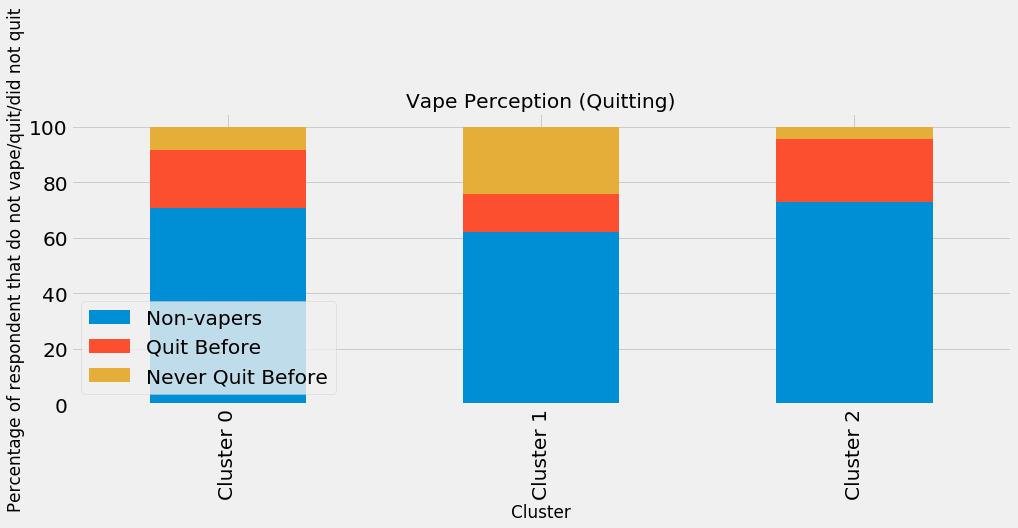

In [207]:
import matplotlib
matplotlib.style.use('fivethirtyeight') 
plotdata3.transpose().apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True)
plt.title("Vape Perception (Quitting)")
plt.xlabel("Cluster")
plt.ylabel("Percentage of respondent that do not vape/quit/did not quit")